In [77]:
import pandas as pd
import numpy as np 
import pickle 
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
plt.rcParams['font.sans-serif'] = ['Microsoft JHenghei']
plt.rcParams['axes.unicode_minus'] = False

In [79]:
get = pickle.load(open('simulation_data/parameters_0.pkl','rb'))

In [80]:
data = pd.read_csv('simulation_data/data_0.csv')

In [81]:
X = data.iloc[:,:5]

In [82]:
T_beta = get['beta']

In [83]:
simu_beta = pd.read_csv('1000_times_beta.csv')
simu_beta

,0,1,2,3,4
0,0.111986,0.293229,-2.053905,0.544035,-0.932102
1,0.109656,0.304574,-2.053782,0.538046,-0.936184
2,0.123569,0.298280,-2.069446,0.547505,-0.936888
3,0.122132,0.309154,-2.058930,0.544892,-0.954317
4,0.106117,0.305763,-2.063343,0.552456,-0.938393
...,...,...,...,...,...
995,0.120913,0.311058,-2.066023,0.547940,-0.950504
996,0.104520,0.305510,-2.048310,0.548772,-0.948050
997,0.107400,0.307324,-2.050638,0.537718,-0.938971
998,0.110172,0.288824,-2.059910,0.555834,-0.932053


In [84]:
B = np.repeat(5,5)
B = B.reshape(5,1)
B = np.dot(B,B.T)

B = B + np.eye(5)

In [87]:
T_beta

array([ 0.09467958,  0.27820584, -2.07799018,  0.53026507, -0.96156416])

In [88]:
(simu_beta - T_beta)

,0,1,2,3,4
0,0.017307,0.015023,0.024085,0.013770,0.029462
1,0.014976,0.026368,0.024208,0.007781,0.025380
2,0.028889,0.020074,0.008545,0.017240,0.024676
3,0.027452,0.030948,0.019060,0.014627,0.007247
4,0.011438,0.027557,0.014647,0.022191,0.023171
...,...,...,...,...,...
995,0.026234,0.032853,0.011968,0.017675,0.011060
996,0.009841,0.027304,0.029681,0.018507,0.013514
997,0.012721,0.029119,0.027352,0.007453,0.022593
998,0.015493,0.010618,0.018080,0.025569,0.029511


In [89]:
V = (simu_beta - T_beta)*np.sqrt(50000)

In [90]:
V.describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.883891,4.582120,4.277461,4.734206,4.698288
std,1.374158,1.411927,1.429553,1.357440,1.347720
min,-0.521867,-0.169036,0.148272,0.359070,0.852179
25%,2.995704,3.588694,3.343736,3.824917,3.814119
50%,3.921985,4.597749,4.261620,4.752853,4.695244
75%,4.800301,5.531957,5.252192,5.673846,5.617215
max,7.426296,9.471273,9.044785,9.164196,8.872594


In [92]:
V.cov()

,0,1,2,3,4
0,0.072627,-0.019299,-0.020514,-0.020471,-0.015120
1,-0.019299,0.076675,-0.021618,-0.018552,-0.020300
2,-0.020514,-0.021618,0.078601,-0.018564,-0.021224
3,-0.020471,-0.018552,-0.018564,0.070871,-0.015919
4,-0.015120,-0.020300,-0.021224,-0.015919,0.069860


In [94]:
np.linalg.inv(B)

array([[ 0.8015873, -0.1984127, -0.1984127, -0.1984127, -0.1984127],
       [-0.1984127,  0.8015873, -0.1984127, -0.1984127, -0.1984127],
       [-0.1984127, -0.1984127,  0.8015873, -0.1984127, -0.1984127],
       [-0.1984127, -0.1984127, -0.1984127,  0.8015873, -0.1984127],
       [-0.1984127, -0.1984127, -0.1984127, -0.1984127,  0.8015873]])

(array([  6.,  32.,  92., 184., 248., 220., 127.,  73.,  14.,   4.]),
 array([-182.63645369, -143.81919297, -105.00193225,  -66.18467153,
         -27.36741081,   11.44984991,   50.26711063,   89.08437135,
         127.90163207,  166.7188928 ,  205.53615352]),
 <a list of 10 Patch objects>)

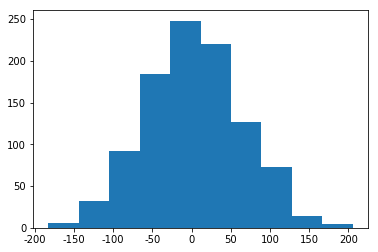

In [17]:
plt.hist(V.iloc[:,0])